In [1]:
experimento = 'Experimento para entrenar un modelo ya entrneado con solo las clases conflictivas\n'

In [2]:
#Importamos las librerias necesarias
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import joblib

import Modulo_SVM

from sklearn.svm import SVC
from sklearn.preprocessing import scale
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

In [3]:
#Cargamos el data set
data = pd.read_csv('C:/Users/jaime/OneDrive - Universidad de Málaga/Escritorio/Jaime/TFG/HuGaDB-master/HuGaDB_v2_Digest/DataFrameFinal.csv')
#Elimino las filas con algún valor de columna vacio 
data = data.dropna()

In [4]:
print(f'\033[5;35m EXPERIMENTO --> {experimento} \033[0;m')

 EXPERIMENTO --> Experimento para entrenar un modelo ya entrneado con solo las clases conflictivas
 


In [5]:
# Hyperparametros
nTest = 0.2

samples = 75000

nTrain = 1-nTest
nSamples =  round(samples / nTrain)
num_splits = 10
kernels = ['poly','rbf', 'linear', 'sigmoide']

nSamples_more = 75000
class_names = ['Standing', 'Up by elevator',  'Down by elevator'] 
labels = [8,10,11]

In [6]:
df = data
# df = df[:nSamples]
df = df[nSamples:(nSamples+nSamples_more)]

In [7]:
# Elimino las clases de las cuales no tengo muestras
# df = df[(df.act == 1) | (df.act == 2) | (df.act == 3) | (df.act == 4) | (df.act == 5) | (df.act == 6) | (df.act == 7) 
#         | (df.act == 8) | (df.act == 9) | (df.act == 12)]
df = df[(df.act == 8) | (df.act == 10) | (df.act == 11)]

In [8]:
X = df.drop(['act'], axis = 'columns')
y = df.act

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=nTest, random_state=42)

num of samples: 25057
[14641, 5870, 4546]


<BarContainer object of 3 artists>

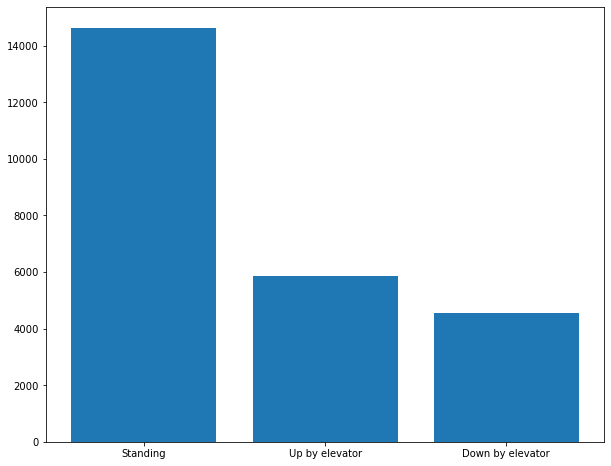

In [11]:
x_values = class_names
# x_values = ['Walking', 'Running', 'Going up', 'Going down', 'Sitting', 'Sitting down', 'Standing up', 'Standing', 
#             'Up by elevator',  'Down by elevator']
y_values = []

y_values.append((df[(df.act == 8)]).shape[0])
y_values.append((df[(df.act == 10)]).shape[0])
y_values.append((df[(df.act == 11)]).shape[0])
print(f'num of samples: {sum(y_values)}')
print(y_values)
plt.figure(figsize=(10,8))
plt.bar(x_values, y_values, width=0.8)           

In [12]:
# # Modelo que entrenaremos 
# # model = SVC(C=0.5,kernel = 'poly', degree=3, gamma='scale', coef0= 4, decision_function_shape='ovo'
# #             ,shrinking=True, probability=True, verbose = True, random_state=42, cache_size = 600)
# # model = SVC(kernel = 'rbf', decision_function_shape='ovo')
# modelo = SVC(kernel = 'rbf', C= 100, gamma= 1, decision_function_shape='ovo')
# model = modelo

In [13]:
# load the model from disk
filename = 'modelo_final_2021-09-04_0.8077_Train_[25000-100000].sav'
loaded_model = joblib.load(filename)
result = loaded_model.score(X_test, y_test)
print(result)
model = loaded_model

0.6009577015163607


In [14]:
# model_name = f'[{0}-{samples}]'
model_name = f'[{samples}-{nSamples_more + samples}]'

Número de muestras: 93750 // kernel: fbf
Accuracy test en split 1 --> 0.5885286783042394
Accuracy test en split 2 --> 0.5855361596009975
Accuracy test en split 3 --> 0.5805486284289276
Accuracy test en split 4 --> 0.5910224438902744
Accuracy test en split 5 --> 0.5830423940149626
Accuracy test en split 6 --> 0.5858283433133733
Accuracy test en split 7 --> 0.592814371257485
Accuracy test en split 8 --> 0.5888223552894212
Accuracy test en split 9 --> 0.5833333333333334
Accuracy test en split 10 --> 0.590818363273453
Time: 4m 54.90625s


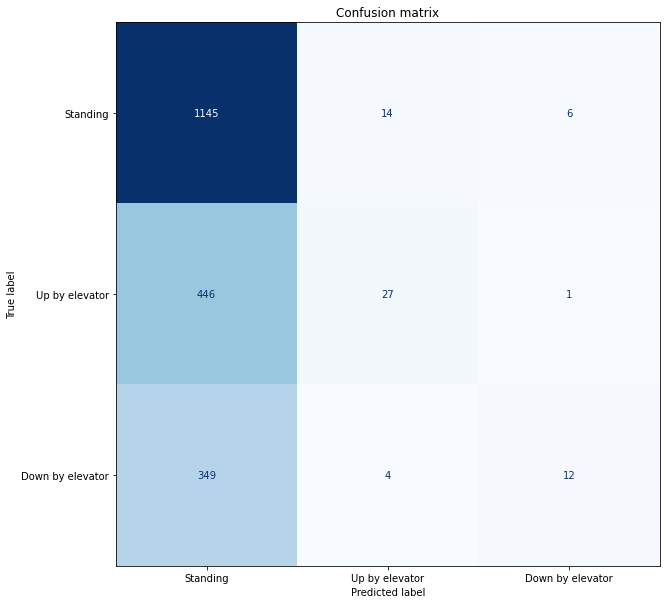

Accuracy medio: 0.5870295070706466 



In [15]:
#Pruebas sin bucle
print('\033[5;34m'+'Número de muestras:', nSamples, '// kernel: fbf'+'\033[0;m')
list_acc, time, best_model = Modulo_SVM.modl(model, X_train, y_train, num_splits, model_name, class_names)
mean_acc = np.mean(list_acc) 
print('\033[5;32m'+'Accuracy medio:', mean_acc, '\n'+'\033[0;m')